--Apple Stock prediction using LSTM model

In [39]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
from keras.models import load_model

import warnings 
warnings.filterwarnings('ignore')

In [30]:
# Importing Apple Stock data
yfin.pdr_override()
start = '2010-01-01'
end = '2019-12-31'
df = pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [31]:
# Droping columns
df = df.reset_index()
df = df.drop(['Date', "Adj Close"], axis= 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


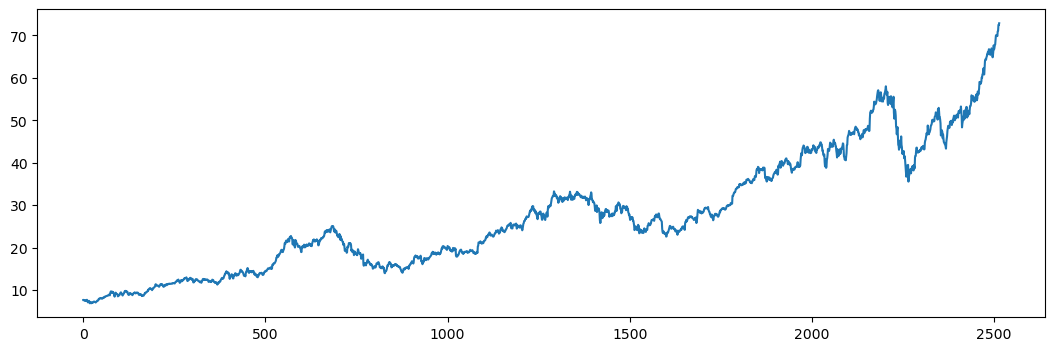

In [32]:
# Show simple graph for close column
plt.figure(figsize = (13,4))
plt.plot(df.Close)

In [5]:
# Calculate the 100-day moving average for the 'Close'
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

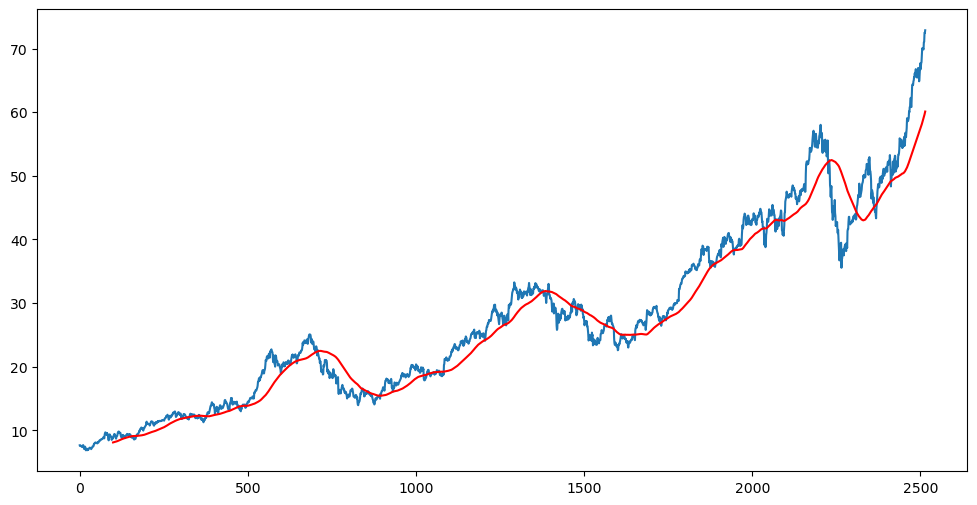

In [6]:
# Ploting Close prices with 100 days moving average
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [7]:
# Calculate the 200-day moving average for the 'Close'
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

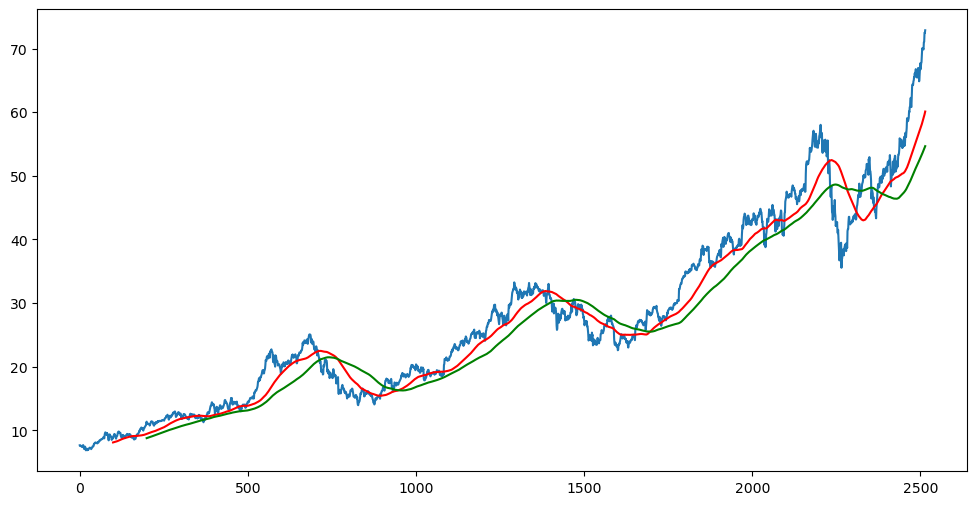

In [8]:
# Ploting Close prices with 100 days and 200 days moving average
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [9]:
# Splitting the data into training and testing dataset
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.7) : int(len(df))])

# Checking testing + training = dataset
print(df.shape[0] == (data_training.shape[0] + data_testing.shape[0]))

True


In [33]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [11]:
data_training_array= scaler.fit_transform(data_training)

In [34]:
# Split
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [13]:
# Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [14]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [15]:
model.compile(optimizer="adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 26s 301ms/step - loss: 0.0638
Epoch 2/50
52/52 [==============================] - 22s 417ms/step - loss: 0.0134
Epoch 3/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0104
Epoch 4/50
52/52 [==============================] - 15s 294ms/step - loss: 0.0092
Epoch 5/50
52/52 [==============================] - 18s 348ms/step - loss: 0.0093
Epoch 6/50
52/52 [==============================] - 17s 322ms/step - loss: 0.0091
Epoch 7/50
52/52 [==============================] - 16s 304ms/step - loss: 0.0089
Epoch 8/50
52/52 [==============================] - 14s 275ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0073
Epoch 10/50
52/52 [==============================] - 14s 274ms/step - loss: 0.0073
Epoch 11/50
52/52 [==============================] - 14s 276ms/step - loss: 0.0075
Epoch 12/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0074
Epoch 13/50
5

In [38]:
model.save('keras_model.h5')

In [18]:
past_100_days = data_training.tail(100)
past_100_days

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [20]:
# final_df = past_100_days.append(data_testing, ignore_index = True)
# final_df.head()

In [21]:
final_df = pd.concat([past_100_days,data_testing],ignore_index = True)
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [36]:
# Scale
input_data = scaler.fit_transform(final_df)

In [35]:
# Split
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [24]:
# Making Predictions 
y_pred = model.predict(x_test)

24/24 [==============================] - 3s 79ms/step


In [26]:
scaler.scale_

array([0.02123255])

In [27]:
scale_factor = 1/0.02123255
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

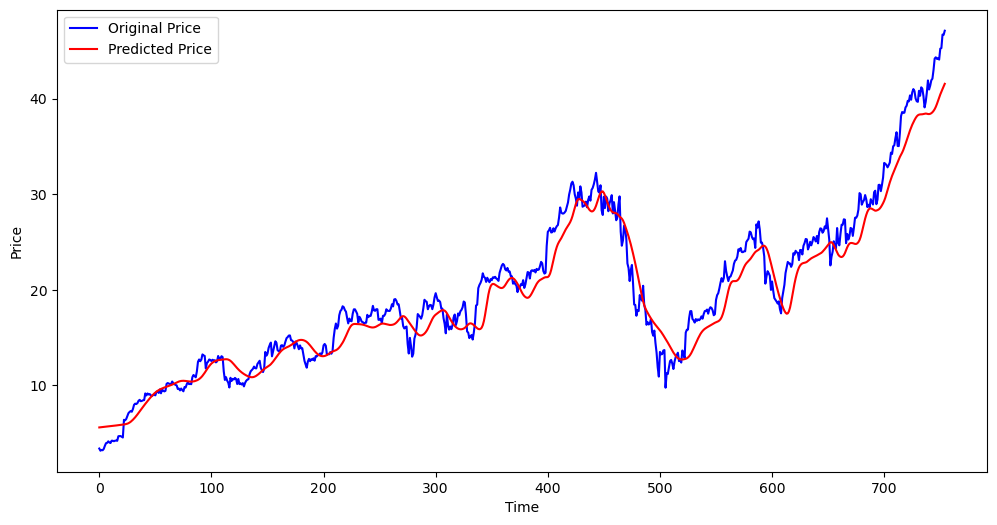

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()